# Summary Assignment for Module 5
<blockquote>This is an assignment in a Jupyter notebook which will be autograded. To avoid autograder errors, please do not add or delete any cells. Also, <b>run all cells even if they are hidden</b> and not requiring any input from you. You may add additional calulations or print statements to any cell to help you see the current values of variables you may be working with.
</blockquote>

**Rounding Error:** Ideally, your answers will be given from a direct Python calculation. For example, given a $2 \times 2$ array $A$, if you are asked to multiply the $(1,3)$ entry with the $(2,2)$ entry and to store the result in a variable `x`, you would type

<code>x = A[1,3]*A[2,2]</code>

(Recall that Python uses zero-based indexing so the $(1,3)$ is actually coming from the second row.)

However, if you compute `A[1,3]*A[2,2]` and see `0.23719445178`, you could choose to type out the answer as, for example,

<code>x = 0.23719445</code>

<u>as long as you keep at least 3 decimal places of accuracy</u>.

In [20]:
# Run this cell to import the NumPy library with the name "np" and a
# couple of testing libraries that will be used by the autograder
import numpy as np
import numpy.testing as npt
from scipy.stats import beta

# Additionally, we will load a plotting library
import matplotlib.pyplot as plt

# Problem 1: The Accept-Reject Algorithm and the Inverse CDF Method

In this exercise, we will use the accept-reject algorithm to simulate values from the continuous distribution with pdf

$$
f(x) = \left\{
\begin{array}{lcl}
60 x^{2} (1-x)^{3} &,& 0\leq x \leq 1\\
0 &,& \mbox{otherwise}
\end{array}
\right.
$$

We will begin by plotting the pdf. The easiest way to do this is to define a finely-spaced sequence of 𝑥-values, evaluate 𝑓(𝑥) at these values to define corresponding 𝑦-values, and finally to plot the (𝑥,𝑦) pairs. Try this by running the next cell.

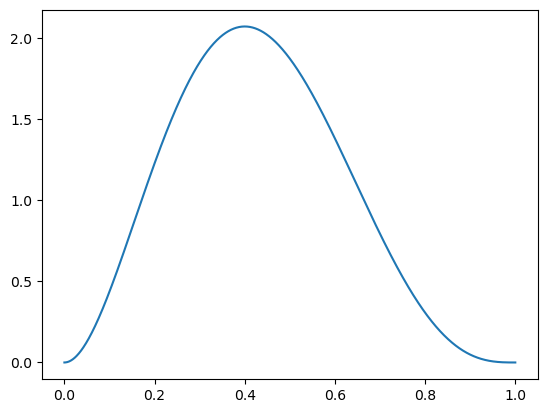

In [21]:
# Plot the target pdf
x = np.linspace(0, 1, 1000)     # Create a sequence of 1000 equally-spaced values between 0 and 1
y = 60*(x**2)*(1-x)**3          # Define the corresponding y values

plt.plot(x, y)                  # Create the plot
plt.show()                      # Show the plot (Your plot will show without this but
                                # it is a good habit to get into for the ultimate display 
                                # of more complex plots and you will get a nicer looking
                                # plot even here!)

Suppose now that we want to keep our plot but to add a second curve given by $y=x^{2}$. We could use the original sequence of $x$-values, define the corresponding $y$-values in a vector <code>y2</code>, and add a second call to the <code>plt.plot()</code> function. Run the next cell. (This is just an example on how to plot a second curve. It is not related to our accept-reject algorithm.)

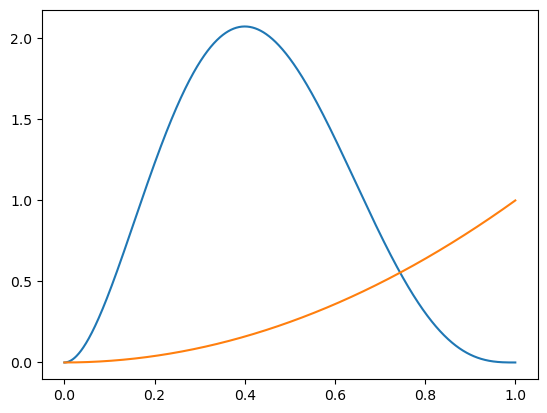

In [22]:
# Plot the target pdf
x = np.linspace(0, 1, 1000)     # Create a sequence of 1000 equally-spaced values between 0 and 1
y = 60*(x**2)*(1-x)**3          # Define the corresponding y values
y2 = x**2                       # Define the y-values for the second function

plt.plot(x, y)                  # Create the plot 
plt.plot(x,y2)                  # Add to the plot
plt.show()                      # Show the plot 

Let's consider running an accept-reject algorithm with one of the following candidate densities on $0 \leq x \leq 1$. (All are zero otherwise.)
<ol>
<li> $h_{1}(x) = 1$   (the uniform distribution)</li>
<li> $h_{2}(x) = 3 x^{2}$
<li> $h_{3}(x) = e^{-x}/(1-e^{-1})$ (the exponential rate $1$ distribution restricted to $[0,1]$ are renormalized to be a valid pdf on $[0,1]$)</li>    
</ol>   

Recall that we need the ratio $f/h$ to be bounded and that we want to find an upper bound on $f/h$ that is as small as possible. 

Run the next cell where we plot the ratio $f/h$ for each of these $h$ functions. If you are having trouble seeing the colors of the different curves, move to the next cell to re-plot using dashed and dotted lines.

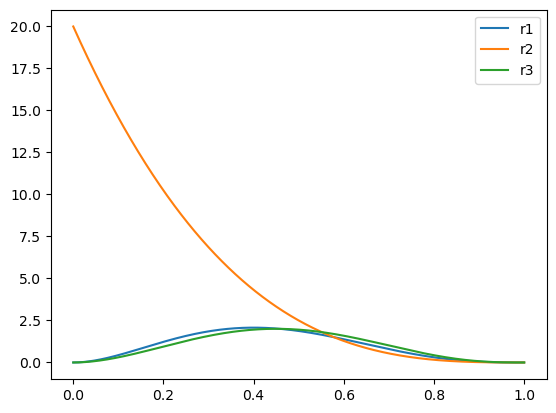

In [23]:
x = np.linspace(0, 1, 1000)                        # Create a sequence of 1000 equally-spaced values between 0 and 1
r1 = 60*(x**2)*(1-x)**3                            # Define ratio for h1
r2 = 20*(1-x)**3                                   # Define ratio for h2
r3 = (1-np.exp(-1))*60*(x**2)*np.exp(x)*(1-x)**3   # Define ratio for h3

plt.plot(x, r1, label ="r1")                  # Create the plot "behing the scenes"
plt.plot(x, r2, label = "r2")                 # The "label" argument is in preparation
plt.plot(x, r3, label = "r3")                 # for creating a legend

plt.legend()                                  # Create the legend                                   
plt.show()                                    # Show the plot 

If you are having difficulty seeing the colors in the plot, you can keep all symbols black and white and use dotted and dashed lines as follows. We will leave the next cell writable in case you want to play with colors and plotting symbols. Because of this, we will include the code here in case you want to restore overwritten code.

<pre><code>x = np.linspace(0, 1, 1000)             # Create a sequence of 1000 equally-spaced values between 0 and 1
r1 = 60*(x**2)*(1-x)**3                            # Define ratio for h1
r2 = 20*(1-x)**3                                   # Define ratio for h2
r3 = (1-np.exp(-1))*60*(x**2)*np.exp(x)*(1-x)**3   # Define ratio for h3

plt.plot(x, r1, label ="r1", color = 'black')                          # Create the plot "behing the scenes"
plt.plot(x, r2, linestyle = "dashed", color='black', label = "r2")     # The "label" argument is in preparation
plt.plot(x, r3, linestyle = "dotted", color='black', label = "r3")     # for creating a legend

plt.legend()                     # Create the legend                                   
plt.show()                       # Show the plot
</code></pre>

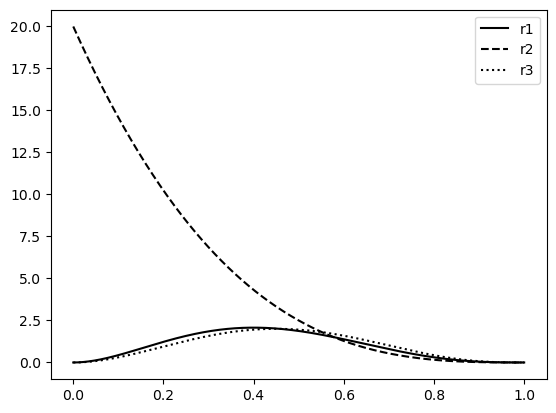

In [24]:
x = np.linspace(0, 1, 1000)                        # Create a sequence of 1000 equally-spaced values between 0 and 1
r1 = 60*(x**2)*(1-x)**3                            # Define ratio for h1
r2 = 20*(1-x)**3                                   # Define ratio for h2
r3 = (1-np.exp(-1))*60*(x**2)*np.exp(x)*(1-x)**3   # Define ratio for h3

plt.plot(x, r1, label ="r1", color = 'black')                          # Create the plot "behing the scenes"
plt.plot(x, r2, linestyle = "dashed", color='black', label = "r2")     # The "label" argument is in preparation
plt.plot(x, r3, linestyle = "dotted", color='black', label = "r3")     # for creating a legend

plt.legend()                     # Create the legend                                   
plt.show()                       # Show the plot

While it may appear that $f/h_{2}$ is unbounded, it is actually bounded (on the interval of interest) and achieving the maximum value of $20$ at $x=0$. Since all three ratios are bounded, we may use any one of the three given proposal densities. However, for the accept-reject ratio, it is most efficient for the proposal density to have the lowest maximum value. (While there may be better proposal densities in this regard, we will limit ourselves to choosing one from this group of 3.) As it is difficult to see what is going on with the two lower curves, we will zoom in a little. In the next plot we will use dots, dashes, and colors. If you are having difficulty distinguishing the plots due to color, change all colors to black or other colors of your choosing using code similar to that in the previous cell.

As we are leaving the cell writable for you to be able to play with the code, we will include the original code here in case you overwrite something important.

<pre><code>x = np.linspace(0, 1, 1000)                        # Create a sequence of 1000 equally-spaced values between 0 and 1
r1 = 60*(x**2)*(1-x)**3                            # Define ratio for h1
r2 = 20*(1-x)**3                                   # Define ratio for h2
r3 = (1-np.exp(-1))*60*(x**2)*np.exp(x)*(1-x)**3   # Define ratio for h3

plt.plot(x, r1, label ="r1")                            # Create the plot "behing the scenes"
plt.plot(x, r2, linestyle = "dashed", label = "r2")     # The "label" argument is in preparation
plt.plot(x, r3, linestyle = "dotted", label = "r3")     # for creating a legend

plt.ylim(0,2.2) 
plt.legend()                     # Create the legend                                   
plt.show()                       # Show the plot
</pre>
</code>

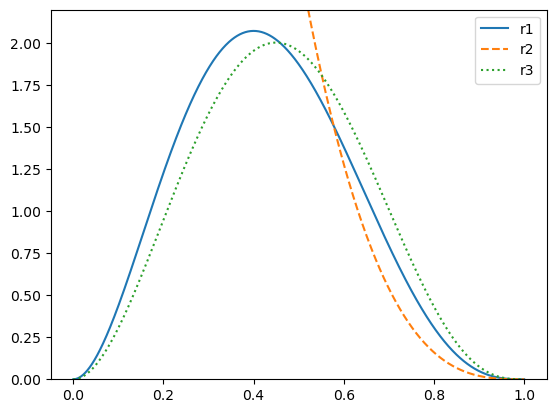

In [25]:
x = np.linspace(0, 1, 1000)                        # Create a sequence of 1000 equally-spaced values between 0 and 1
r1 = 60*(x**2)*(1-x)**3                            # Define ratio for h1
r2 = 20*(1-x)**3                                   # Define ratio for h2
r3 = (1-np.exp(-1))*60*(x**2)*np.exp(x)*(1-x)**3   # Define ratio for h3

plt.plot(x, r1, label ="r1")                            # Create the plot "behing the scenes"
plt.plot(x, r2, linestyle = "dashed", label = "r2")     # The "label" argument is in preparation
plt.plot(x, r3, linestyle = "dotted", label = "r3")     # for creating a legend

plt.ylim(0,2.2) 
plt.legend()                     # Create the legend                                   
plt.show()                       # Show the plot

**Part A)** Which of the three proposal densities will give the fastest accept-reject algorithm?

Your answer should be 1, 2, or 3. Store your answer as p1_a.

In [26]:
p1_a = 3

# your code here


In [27]:
# Hidden Test Cell, RUN THIS CELL!
# NOTE: This cell contains hidden tests. You will not see whether you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

**Part B)** Regardless of your answer to part (A), for practice, we are going to simulate some values from the distribution with pdf $h(x) = 3x^{2}$ on $0 \leq x \leq 1$ using the inverse cdf method. Work out the cdf and invert it on paper.

In the next cell, generate a vector of 100,000 values from the uniform random number generator. (See the ungraded lab in Lesson 1 of Module 5 if you need help with this.) Store the results in a vector named <code>u</code>. Additionally, put all values through the inverse cdf. Call this vector y. You should be able to do both of these things in two lines of code. Replace the "None"s in the next cell with your code.

In [17]:
u = np.random.rand(100000) 
y = u**(1/3)

# your code here


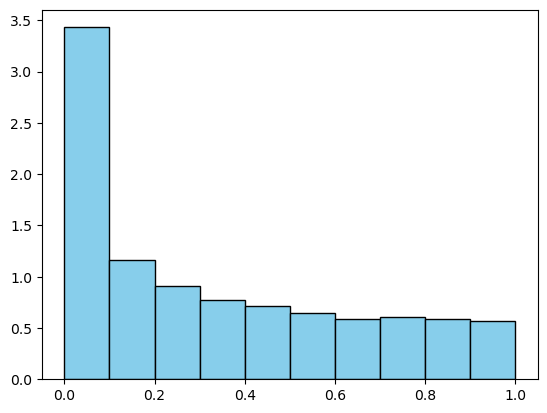

In [28]:
# Run this cell. Add some lines before plt.show() to superimpose the target pdf h(x)=3x^2
# See the Python tutorial in Lesson 1 of Module 5 if you need help with superimposing the target pdf
br = np.arange(0.0, 1.1, 0.1)
plt.hist(y, bins=br, color='skyblue', edgecolor='black', density='True')

# Your additional code here



plt.show()

In [29]:
# Hidden Test Cell, RUN THIS CELL!
# NOTE: This cell contains hidden tests. You will not see whether you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

**Part C)** We are now going to run the accept- reject algorithm to simulate 100,000 values from the target pdf

$$
f(x) = \left\{
\begin{array}{lcl}
60 x^{2} (1-x)^{3} &,& 0\leq x \leq 1\\
0 &,& \mbox{otherwise}
\end{array}
\right.
$$

For simplicity, we will use the uniform $(0,1)$ distribution as the candidate distribution. That is, we will use $h_{1}(x)=1$ for $0 \leq x \leq 1$.

Find an upper bound on $f/h_{1}$. Call it "cee". (In the algorithm it was called "c" but this can lead to unexpected behavior in R since the letter c is used to define vectors.)

In [30]:
cee = 2.0736

# your code here


In [31]:
# Hidden Test Cell, RUN THIS CELL!
# NOTE: This cell contains hidden tests. You will not see whether you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

The next cell will have partially completed code for you to fill in. Since we are leaving the cell "writable" for you, you may accidentally delete something important. We will put the partially completed code here in case you need to reproduce it.

<pre>
<code># Set up a vector to store the output
mysample = np.zeros(100000)

# Start a loop to generate each value
for i in range(100000):
    
    # Propose a value from h
    y = np.random.rand()
    
    # Form the ratio f(Y)/h(Y)
    ratio =                          # <- fill in the ratio here
    
    # Generate a unif(0,1) 
    u = np.random.rand()
    
    while u > ratio:
        # Repeat those 3 steps
        y =                          # <- propose a value from h here
        ratio =                      # <- fill in the ratio here
        u =                          # <- generate a unif(0,1)
        
    mysample[i] = y
</code>
</pre>

Now move to the next cell to complete the code for the accept-reject algorithm to sample 100,000 values from the target distribution using the uniform distribution as a proposal distribution and your already assigned value of cee.

In [32]:
# Set up a vector to store the output
mysample = np.zeros(100000)

# Start a loop to generate each value
for i in range(100000):
    
    # Propose a value from h
    y = np.random.rand()
    
    # Form the ratio f(Y)/h(Y)
    ratio = (60 * (y**2) * ((1 - y)**3)) / cee                          # <- fill in the ratio here
    
    # Generate a unif(0,1) 
    u = np.random.rand()
    
    while u > ratio:
        # Repeat those 3 steps
        y = np.random.rand()                         # <- propose a value from h here
        ratio = (60 * (y**2) * ((1 - y)**3)) / cee                     # <- fill in the ratio here
        u = np.random.rand()                        # <- generate a unif(0,1)
        
    mysample[i] = y

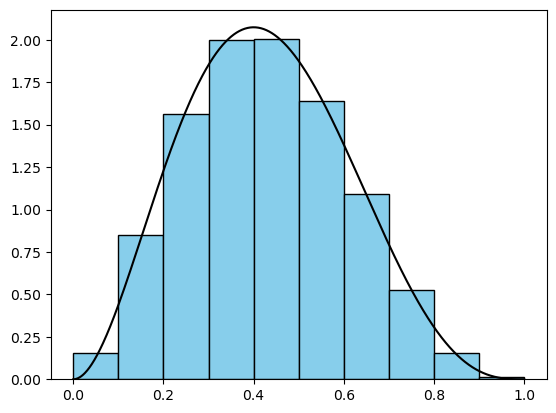

In [33]:
# Run this cell to see the results.
# If you do not see a good match between the histogram and the superimposed
# target pdf, there is something wrong with your code in the previous cell.
# Check your work and try again!

br = np.arange(0.0, 1.1, 0.1)
plt.hist(mysample, bins=br, color='skyblue', edgecolor='black', density='True')

x = np.linspace(0, 1, 1000)
f = 60*(x**2)*((1-x)**3)
plt.plot(x,f,color='black')

plt.show()

In [34]:
# Hidden Test Cell, RUN THIS CELL!
# NOTE: This cell contains hidden tests. You will not see whether you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

# Problem 2: The Metropolis-Hastings Algorithm

In this exercise, we will use the Metropolis-Hastings algorithm to simulate values from the continuous distribution with pdf

$$
\pi(x_{1},x_{2}) = \left\{
\begin{array}{lcl}
\frac{1}{\ln 2} e^{-(x_{1}+1)x_{2}} &,& 0 < x_{1} < 1, x_{2}>0\\
0 &,& \mbox{otherwise}
\end{array}
\right.
$$

Recall that we must choose a transtion candidate density $q((x_{1},x_{2}),(y_{1},y_{2}))$ from which we will propose points $(y_{1},y_{2})$. For simplicity, we will choose it to have the form $q(y_{1},y_{2})$. That is, we will propose $(y_{1},y_{2})$ independent of $(x_{1},x_{2})$. For even more simplicity, we will propose $y_{1}$ and $y_{2}$ independently so that $q(y_{1},y_{2}) = q_{1}(y_{1}) \cdot q_{2}(y_{2})$. Since we need to propose $y_{1}$ values in the interval $(0,1)$ and $y_{2}$ values in $(0,\infty)$, we will take $q_{1}$ to be the uniform pdf over $(0,1)$ and $q_{2}$ to be the exponential rate 1 pdf.

Note that $q(y_{1},y_{2}) = q_{1}(y_{1}) \cdot q_{2} (y_{2}) = 1 \cdot e^{-y_{2}}= e^{-y_{2}}$ for $0<y_{1}<1$ and $y_{2}>0$. Thus,

$$
\frac{\pi(x_{1},x_{2})}{q(x_{1},x_{2})} = \frac{1}{\ln 2} e^{-x_{1} x_{2}}.
$$

The ratio or second component the Metropolis-Hastings acceptance probability:

$$
\begin{array}{lcl}
\alpha((x_{1},x_{2}),(y_{1},y_{2})) &=& \min \left( 1, \frac{\pi(y_{1},y_{2}) \, q((y_{1},y_{2}),(x_{1},x_{2}))}{\pi(x_{1},x_{2}) \, q((x_{1},x_{2}),(y_{1},y_{2}))} \right)\\
&=& 
 \min \left( 1, \frac{\pi(y_{1},y_{2}) \, q(x_{1},x_{2})}{\pi(x_{1},x_{2}) \, q(y_{1},y_{2})} \right)
\end{array}
$$
is 
$$
\exp[-y_{1}y_{2}+x_{1}x_{2}].
$$

An example of coding this with vectors $x$ and $y$ is given in the next cell.

In [35]:
# Run this cell
x = np.array([0.5,1.2])
y = np.array([0.2,0.8])
ratio = np.exp(-y[0]*y[1]+x[0]*x[1])
ratio

1.552707218511336

It was mentioned in the video lectures, that one does not need to code the minimum of $\alpha(x,y)$ into the Metropolis-Hastings algorithm since an observed $u$ from the uniform distribution on $(0,1)$ is less than or equal to 

$$
\min (1,ratio)
$$

if and only if it is less than $ratio$ alone. However, if one wishes to include this detail, there is a minimum function in Python. Check it out in the next cell!

In [36]:
# Run this cell
x = np.array([0.5,1.2])
y = np.array([0.2,0.8])
ratio = np.exp(-y[0]*y[1]+x[0]*x[1])
alpha = min(1,ratio)
alpha

1

## An Important Note About Copying an Array in Python

For our MCMC algorithms, we have often talked about always calling the current value of the chain $x$, working with some proposed state $y$, and then possibly setting the new current value of the chain to be $y$ by assigning $x=y$. If $x$ and $y$ are scalar values in Python, this will give expected results. For example, consider the code

<pre><code>
x = 1      # Some initial value for x
y = 3      # Some proposed value for y
x = y      # Setting x to be y after some kind of acceptance move
y = 2      # Proposing another value of y
x          # Print out x</code></pre>

What value do you expect to see printed at the end? The last time $x$ was set to something, it was set to $3$. This code will print out a 3 at the end. (The next cell is left empty if you want to try this code!)

However, when working with arrays

<pre><code>
x = np.array([2, 4, 1])   # Some initial value for x
y = np.array([1, 3, 5])   # Some proposed value for y
x = y                     # Setting x to be y after some kind of acceptance move
y[0] = 11                 # Making a modification to y
x                         # Print out x
 </code></pre>
what do you expect to see printed at the end? If you copy, paste, and run this code in the next cell, you might be surprised to see the output
<pre><code>array([11,  3,  5])</code></pre>

Setting $x$ to be $y$ and then modifying $y$ has actually changed $x$! This has to do with the way that Python allocates memory for each variable. In order to avoid unpleasant surprises, when intending to make a copy of an array in Python, we must use the <code>np.copy()</code> function. For the code to work as expected, we should write it like this.

<pre><code>
x = np.array([2, 4, 1])   # Some initial value for x
y = np.array([1, 3, 5])   # Some proposed value for y
x = np.copy(y)                     # Setting x to be y after some kind of acceptance move
y[0] = 11                 # Making a modification to y
x                         # Print out x
 </code></pre>
 
The result will now be <pre><code>array([1, 3, 5])</code></pre>

In [ ]:
# A free cell for you to experiment in
     

We are now ready to code the Metropolis-Hastings algorithm! Complete the code in the <b>next</b> cell. You may add extra lines anywhere if needed.

We will leave the original unfinished code here in case you need to start over. You can cut and paste this into the next cell to reset.

<pre><code>
# Set up the number of independent runs of the chain and how
# far out to run the chain. We are keeping these small until 
# our code is running succesfully!
reps = 100000
longtime = 500

# Arbitrarily initialize a proposal vector y
y = np.zeros(2)

# Set up a two-column matrix to store the output
# One two-dimensional point in each row
mysample = np.zeros((reps, 2))

# Start a loop to generate each value
for i in range(reps):
    
    # Start a chain at an arbitrary two-dimensional x (x[1] must be between 0 and 1)
    x = np.array([0.5,1])

    # Loop to move forward
    for j in range(longtime):
        
        # propose y1 from the unif(0,1) distribution
        y[0] =                                          # <- finish code here

        # propose y2 from the exp(rate=1) distribution
        y[1] =                                          # <- finish code here (If you need more lines add more lines!)

        # Compute the acceptance ratio
        ratio =                                         # <- finish code here (Hint: This is in a previous cell!)

        # Get a unif(0,1) from the RNG
        u =                                             # <- finish code here

        if u <= ratio:
            x = np.copy(y)                 # This is the case where x is updated to y. If this is
                                  # not going to happen, we do nothing because we are keeping x = x.


    # Store value for one run after a long time for the ith chain
    mysample[i,:] = x   
    </code></pre>

In [37]:
# Set up the number of independent runs of the chain and how
# far out to run the chain. WE ARE KEEPING THESE SMALL UNTIL 
# OUR CODE IS RUNNING SUCCESSFULLY!
reps = 10
longtime = 20

# Arbitrarily initialize a proposal vector y
y = np.zeros(2)

# Set up a two-column matrix to store the output
# One two-dimensional point in each row
mysample = np.zeros((reps, 2))

# Start a loop to generate each value
for i in range(reps):
    
    # Start a chain at an arbitrary two-dimensional x (x[1] must be between 0 and 1)
    x = np.array([0.5,1])

    # Loop to move forward
    for j in range(longtime):
        
        # propose y1 from the unif(0,1) distribution
        y[0] = np.random.rand()                                         # <- finish code here

        # propose y2 from the exp(rate=1) distribution
        y[1] =  np.random.exponential(1.0)                                        # <- finish code here (If you need more lines add more lines!)

        # Compute the acceptance ratio
        ratio = np.exp(-y[0]*y[1]+x[0]*x[1])                                        # <- finish code here (Hint: This is in a previous cell!)
        ratio = min(1, ratio)
        # Get a unif(0,1) from the RNG
        u =  np.random.rand()                                           # <- finish code here

        if u <= ratio:
            x = np.copy(y)                 # This is the case where x is updated to y. If this is
                                  # not going to happen, we do nothing because we are keeping x = x.


    # Store value for one run after a long time for the ith chain
    mysample[i,:] = x   

Here are some probabilities for you to test

$$
\int_{0}^{1} \int_{0}^{1} x_{1} e^{-x_{1} x_{2}} \, dx_{1} \, dx_{2} \approx 0.754044
$$

$$
\int_{0}^{2} \int_{0}^{1} x_{1} e^{-x_{1} x_{2}} \, dx_{1} \, dx_{2} \approx 0.934904
$$

$$
\int_{1}^{1.5} \int_{0.1}^{0.3} x_{1} e^{-x_{1} x_{2}} \, dx_{1} \, dx_{2} \approx 0.032759
$$

In the previous cell, increase your sample size "reps" and the amount of time "longtime" that you run out your chains and re-run the cell. Be patient if you have selected large values for "reps" and "longtime"! If you see "In[*]" to the left of the cell, it is still running. Remember, there will always be some sampling variability when you are estimating probabilities with a finite sample. You will not see these exact numbers even for a large sample.

Run the next cell to see how your sample proportions match up. Do not be overly concerned with the code there. The first line, for example, is counting the number of times that the first column of "mysample" will be less than 1 (which will actually be all values in this column) <u>and</u> the number of times the second column will be less than 1. <code>np.shape(mysample)</code> will return a two-dimensional array containing the rows and columns in mysample. <code>np.shape(mysample)[0]</code> will give the number of rows which is your sample size.  In the end, we divide by your total sample size to get the proportion of samples produced that are in the various regions of interest.

In [38]:
# Check some regions
print(np.count_nonzero((mysample[:,0] < 1) & (mysample[:,1]<1))/np.shape(mysample)[0])
print(np.count_nonzero((mysample[:,0] < 1) & (mysample[:,1]<2))/np.shape(mysample)[0])
print(np.count_nonzero((mysample[:,0] > 0.1) & (mysample[:,0] < 0.3) & (mysample[:,1]>1) & (mysample[:,1]<1.5))/np.shape(mysample)[0])

0.8
1.0
0.2


Run the next cell for the autograder to test your results over some hidden regions!

Note: We have built-in a significant amount of potential error here in the case that your Metropolis-Hastings algorithm is producing an outlier sample. In extremely rare instances, you may fail this test even with a correct algorithm. In this case, please run you algorithm again and re-submit this programming assignment.


In [39]:
# Hidden Test Cell, RUN THIS CELL!
# NOTE: This cell contains hidden tests. You will not see whether you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.